# Experiment description:

- Implement Supervised Techniques analysis using data about students performance in virtual classes

Imports

In [110]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import pydotplus
import graphviz
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn.metrics as metrics
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from numpy import array 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_excel('../data/processed/dataset_clean.xlsx')
data = data.drop(["SRL"], axis=1)
data

,StrategicPlanning,SelfEvaluation,TaskStrategies,Elaboration,HelpSeeking,only lecture,Atry to lecture,explore,only asessment,Lcomplete to Atry,...,isfemale,emp_student,emp_job,emp_job.1,days_act,num_events,num_ses,grade,cluster,Gano
0,1.50,1.666667,0.833333,2.000000,1.50,5.000000,0.0,5.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,13.0,2.0,16.0,6.000000,0.0,NO
1,3.00,2.000000,1.000000,3.000000,1.50,0.000000,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,NO
2,1.75,1.333333,1.000000,2.000000,0.50,3.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,NO
3,2.75,1.333333,1.166667,2.333333,2.75,2.000000,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,1.0,5.0,1.0,0.000000,0.0,NO
4,2.00,2.000000,1.166667,2.333333,1.25,4.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,2.0,13.0,2.0,0.000000,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,3.00,4.000000,3.500000,3.666667,2.75,12.000000,170.0,5.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,12.0,305.0,19.0,75.000000,1.0,SI
490,3.75,3.666667,3.500000,3.666667,3.25,28.000000,170.0,15.0,9.0,0.000000,...,0.0,0.0,1.0,0.0,14.0,246.0,35.0,81.142855,1.0,SI
491,4.00,4.000000,4.000000,4.000000,3.75,18.423358,170.0,0.0,0.0,0.259091,...,0.0,0.0,1.0,0.0,13.0,269.0,36.0,87.685716,1.0,SI
492,2.25,2.000000,2.500000,2.333333,1.00,24.000000,180.0,0.0,5.0,0.259091,...,0.0,1.0,0.0,1.0,21.0,407.0,36.0,89.952379,1.0,SI


In [3]:
def get_description_for_categorial_variables(data_frame: pd.DataFrame, column: str) -> None:
    count_df = data_frame.groupby([column])[column].count()
    title = "Count of {variable} categories".format(variable=column)
    fig = px.bar(count_df, x=column, title=title)
    fig.show()
    print(f"Categories = {len(count_df)}")
    print("count per element: ")
    for k, v in count_df.items():
        print(f'Count:\n {k} = {v}\nPercentage:\n {k} = {(v/len(data_frame)*100)}%')

Even tho there is more data in the 'SI' class, is not really unbalanced after cleaning, so we do not need to do any additional process to manage the unbalanced data  

In [4]:
get_description_for_categorial_variables(data, 'Gano')

Categories = 2
count per element: 
Count:
 NO = 220
Percentage:
 NO = 44.534412955465584%
Count:
 SI = 274
Percentage:
 SI = 55.465587044534416%


In the next section we do a little transforming to the variables

In [13]:
data.loc[(data['Gano'] == "NO") , ['Gano']]= 0
data.loc[(data['Gano'] == "SI") , ['Gano']]= 1
data = pd.get_dummies(data, columns=['isfemale','prior_exp', 'int_topic', 'int_assess', 'edu', 'emp_student', 'emp_job', 'cluster'])

We need to create a tree model finding the best parameters in order to have a good model. After creating the first model we can see could be overfiting, since a perfect accuracy, does not mean something really good 😥

In [14]:
X = data.drop('Gano', axis=1)
y = data['Gano']
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,y_train)

In [15]:
y_pred = clf.predict(X_test)
print("Accuracy:\n",metrics.accuracy_score(y_test, y_pred))

Accuracy:
 1.0


We use also the cross validation, and also shows a great score mean, almost 100% with a standard deviation of 0.006, meaning that the predictions are low scattered from each one more or less. 🤔

In [16]:
kFold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
score = (model_selection.cross_val_score(clf, X, y,  scoring = scoring, cv = kFold))
print (f"( score mean: {score.mean()}, standard deviation: {score.std()})")

( score mean: 0.9979591836734695, standard deviation: 0.006122448979591843)


In [17]:
feature_cols = list(X.columns.values)
class_names = ['0', '1']

In [18]:
def save_tree_visualization(clf: DecisionTreeClassifier, feature_cols: list, class_names:list, path: str) -> None:
    dot_data = export_graphviz(clf, out_file=None, filled=True, feature_names = feature_cols, class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf(path)

In [46]:
path = "../data/interim/decision_tree_classifier_unparametrized.pdf"    
save_tree_visualization(clf, feature_cols, class_names, path)

In the next graphic we can see the tree generated, that obviously does shows no good interpretation, however selects the variable 'cluster' as root. 

<img src='images/tree_unparametrized.png' alt="Tree without good parameters" />

We need now find ways to optimize the solution in order to have a better model, right now we are going to use the SelectKBest in order to find the best features 

In [20]:
best = SelectKBest(k=7)
features = array(X.columns)
X_best_features = best.fit_transform(X, y)
filter = best.get_support()
print(features[filter])

['only lecture' 'Atry to lecture' 'days_act' 'num_events' 'num_ses'
 'grade' 'cluster_0.0']


c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning:

divide by zero encountered in true_divide



We create a new model with those best features, and also we found that is not quite interesting the result. 

In [40]:
best_cols = ['only lecture', 'Atry to lecture', 'days_act', 'num_events', 'num_ses', 'grade', 'cluster_0.0']
X_best_features = X[best_cols]
X_traink, X_testk, y_traink, y_testk = train_test_split(X_best_features, y, test_size=0.3, random_state=12345)

clfk = DecisionTreeClassifier(criterion='entropy')
clfk = clfk.fit(X_traink, y_traink)
print()
y_predk = clfk.predict(X_testk)
print("Accuracy:\n",metrics.accuracy_score(y_testk, y_predk))


Accuracy:
 1.0


The cross validation shows a perfect score, we also shows no improvement at all. 🙄

In [41]:
kFold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

score_dummies_k_best = (model_selection.cross_val_score(clfk, X_best_features, y,  scoring = scoring, cv = kFold))
print (f"( score = {score_dummies_k_best.mean()}, standard deviation = {score_dummies_k_best.std()})")

( score = 0.9979591836734695, standard deviation = 0.006122448979591843)


In [52]:
path_2 = "../data/interim/decision_tree_classifier_unparametrized_k_best.pdf"    
#save_tree_visualization(clfk, best_cols, class_names, path_2)

The next graphic shows the tree made using the best features. Almost the same as the last one, selecting 'cluster_0.0' as the root. 

<img src='images/tree_k_best.png' alt="Tree without good parameters but with best features" />

Now we do a Selection of the best parameters to have the best model. And the parameter selections made by the GridSearchCV, are {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [49]:
parameters = {'max_depth': [2, 4, 5, 7, 9, 10], 'criterion': ["gini", "entropy", "log_loss"], 'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning:

`max_features='auto'` has been deprecated in

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

With the best parameters we have a selection with accuracy of 100% which shows overfiting.

In [50]:
clf_best_parameters = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt')
clf_dummies_best_paramters = clf_best_parameters.fit(X_train, y_train)

y_pred_best = clf_dummies_best_paramters.predict(X_test)
print(y_pred_best)
print("Accuracy:\n",metrics.accuracy_score(y_test, y_pred_best))

[0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0
 1]
Accuracy:
 1.0


However using the cross validation, we have an accuracy of 98.77% with a standard deviation of 0.02.

In [51]:
scoring_dummies = 'accuracy'
score_dummies = (model_selection.cross_val_score(clf_dummies_best_paramters, X, y,  scoring = scoring, cv = kFold))
print (f"( {score_dummies.mean()}, {score_dummies.std()} )")

( 0.987795918367347, 0.020796669390216006 )


In [53]:
path_3 = "../data/interim/decision_tree_classifier_parametrized.pdf"    
#save_tree_visualization(clf_dummies_best_paramters, feature_cols, class_names, path_3)

The visual tree, shows that with a grade minor or equal than 59.94, the student most likely will loss the class, this is also a rule made by the dataset, which can be confirmed with this model. 

<img src='images/tree_parametrized.png' alt="Tree with the best parameters" />


Before we make more models, we want to add a new one, in order to have the best features and the best parameters together in one model.

Doing the validations, we can see we have a better model, even tho is close to 100%.

In [106]:
best_cols = ['only lecture', 'Atry to lecture', 'days_act', 'num_events', 'num_ses', 'grade', 'cluster_0.0']
X_best_features = X[best_cols]
X_traink, X_testk, y_traink, y_testk = train_test_split(X_best_features, y, test_size=0.3, random_state=1)
parameters = {'max_depth': [4, 5, 7, 9, 10, 12, 14], 
                'criterion': ["gini", "entropy", "log_loss"], 
                'max_features': ['sqrt', 'log2']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
grid_search.fit(X_traink, y_traink)

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

The next tree select the Atry to lecture column as the root of tree, and also has various other nodes related to the same column num_ses. A student that has an Atry to lecture less or equal than 27, will definetely lose the class. In other case, if the student has an Atrt to lecture more than 27 and a num_ses more than 6.211 will win the class, if the num_ses is less or equal than 6.211, we will have to check again if its less or equal than 5.0, meaning that the student will failed the class, otherwise will win.

<img src='images/best_tree.png' alt="Best tree" />


In [107]:
clf_best_parameters_k_best = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, max_features= 'sqrt')
clf_dummies_best_paramters_k_best = clf_best_parameters_k_best.fit(X_traink, y_traink)

y_pred_bestk = clf_dummies_best_paramters_k_best.predict(X_testk)
print("Accuracy:\n",metrics.accuracy_score(y_testk, y_pred_bestk))

Accuracy:
 0.9932885906040269


In [108]:
score_best_parameteres_k_best = (model_selection.cross_val_score(clf_best_parameters_k_best, X_best_features, y,  scoring = scoring, cv = kFold))
print (f"( {score_best_parameteres_k_best.mean()}, {score_best_parameteres_k_best.std()}")

( 0.9979591836734695, 0.006122448979591843


In [109]:
path_5 = "../data/interim/decision_tree_classifier_parametrized_k_best_3.pdf"    
#save_tree_visualization(clf_best_parameters_k_best, best_cols, class_names, path_5)

After having that tree we need to use the RandomForest algorithm and also here we check the most important feature for the random forest

In [119]:
random_forest_params = {'n_estimators': [1,50,100], 'criterion': ['gini', 'entropy', 'log_loss'], 
                        'max_features' : ['sqrt', 'log2', None]}

grid_search = GridSearchCV(RandomForestClassifier(), random_forest_params, cv=5, return_train_score=True)
grid_search.fit(X_traink, y_traink)
print('Best score: ',grid_search.best_score_)
print('Best params: ', grid_search.best_params_)

Best score:  1.0
Best params:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


In [120]:
random_forest_clf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_features='sqrt')
random_forest_clf.fit(X_traink, y_traink)

RandomForestClassifier(n_estimators=50)

In [122]:
y_pred_random_forest = random_forest_clf.predict(X_testk)
print("Accuracy:\n",metrics.accuracy_score(y_testk, y_pred_random_forest))
scoring_random_forest = 'accuracy'

Accuracy:
 1.0


In [123]:
score_random_forest = (model_selection.cross_val_score(random_forest_clf, X_best_features, y,  scoring = scoring_random_forest, cv = kFold))
print (f"( score = {score_random_forest.mean()}, standard deviation = {score_random_forest.std()} )")

( score = 1.0, standard deviation = 0.0 )


Based on the code made in https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html we do the analysis of the feature importances using the Impurity-based feature importances, which basically 'computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.'

In [128]:
importances = random_forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_clf.estimators_], axis=0)

In [133]:
importances

array([0.07546442, 0.24679735, 0.00049593, 0.17346674, 0.03993439,
       0.21062222, 0.25321895])

Here we can see that the most importance varaibles are Atry to lecture, num_events, grade and cluster_0.0

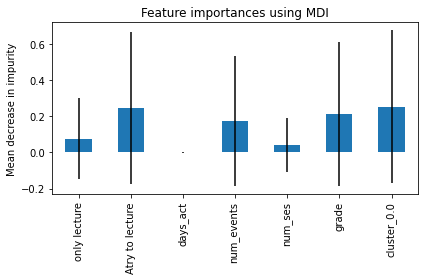

In [131]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=best_cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()